# SMS Spam Classifier 

# Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset.

In [2]:
df = pd.read_csv('spam1.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Basic Understanding of Data.

### 1. Checking the Dimensions of Dataset.

In [3]:
df.shape

(5572, 5)

### 2 Checking Missing Values.

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### 3. Checking How much data is Missing Records.

In [5]:
df.isnull().sum().mean()/100

33.296

### 4. Performing Descriptive Statistical Analysis.

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### 5. Checking Duplicate Records.

In [7]:
df.duplicated().sum()

403

### 5. Checking unique number Records.

In [8]:
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

## 1. Data Cleaning

### 1. Checking Data Information.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 2. Drop Last 3 Columns.

In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 3. Renaming the Columns.

In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
809,ham,Ugh I don't wanna get out of bed. It's so warm.
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
3191,ham,Is ur paper today in e morn or aft?
4833,ham,I hope your pee burns tonite.
58,ham,Tell where you reached


### 4. Using LabelEncoder.

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 5. Checking Missing Value.

In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

### 6. Checking Duplicates Values.

In [17]:
df.duplicated().sum()

403

### 7. Remove the Duplicates Values.

In [18]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# Exploratory Data Analysis (EDA)

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

### 1. Show the Ham & Spam Data Using Pie Chart.

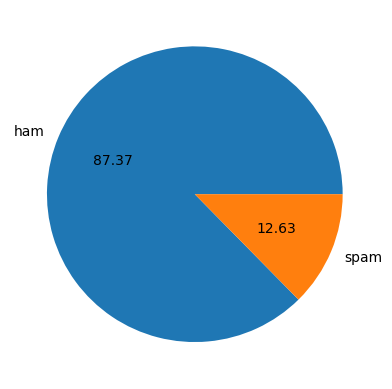

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct ='%0.2f');

### 2. Data is Imbalance.

In [24]:
import nltk

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Abdul
[nltk_data]     Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### 3. Number of Words.

In [28]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### 4. Ham Messages.

In [33]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### 5. Spam Messages.

In [34]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### 6. Historical Plot Diagram Count & Numbers_Characters.

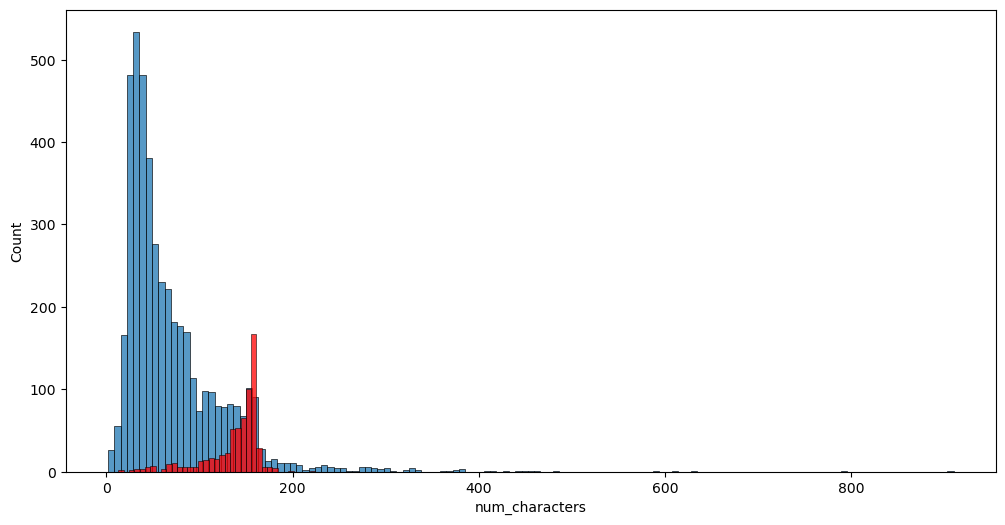

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red');

### 7. Historical Plot Diagram Count & Numbers_Words.

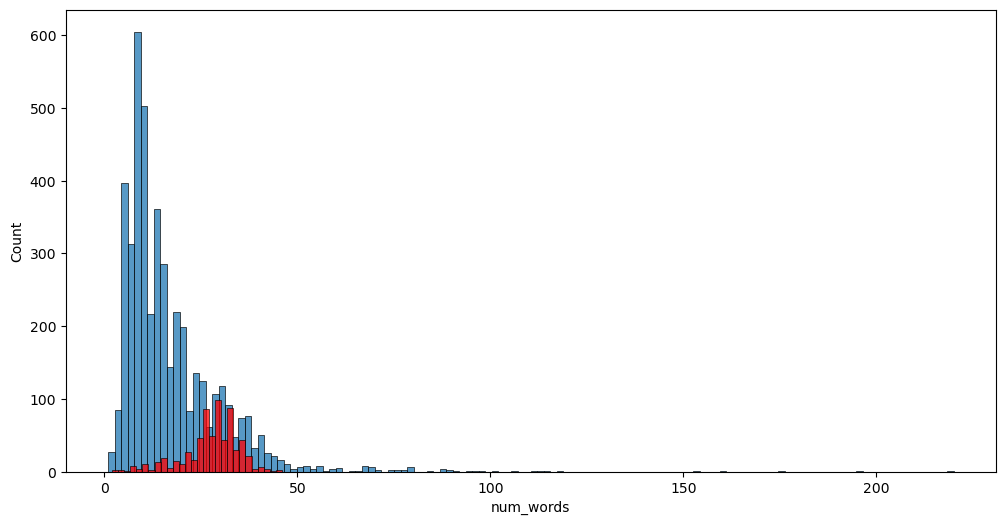

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red');

### 8. Pair Plot Ham & Spam.

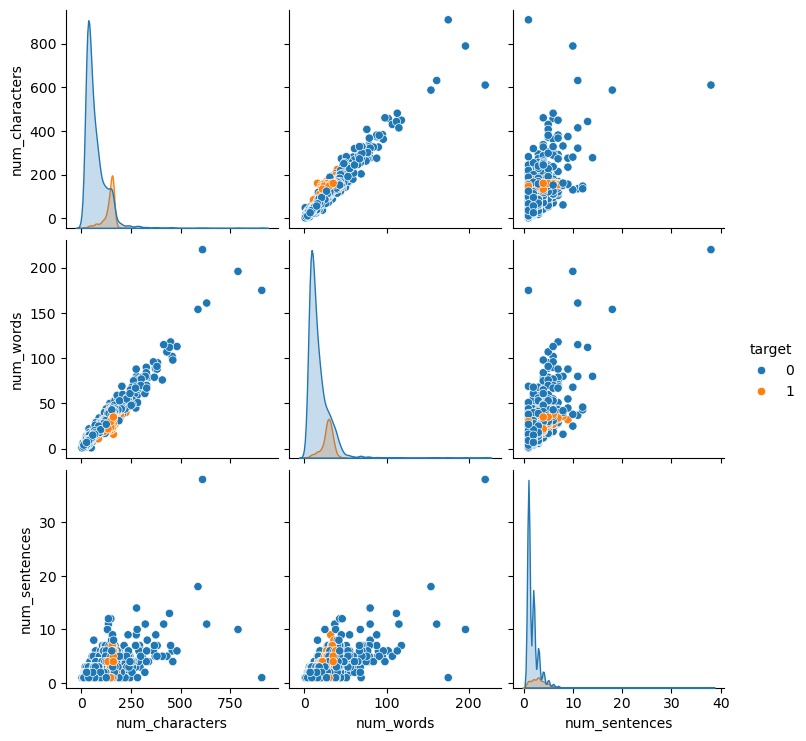

In [37]:
sns.pairplot(df,hue='target')

### 9. Heatmap.

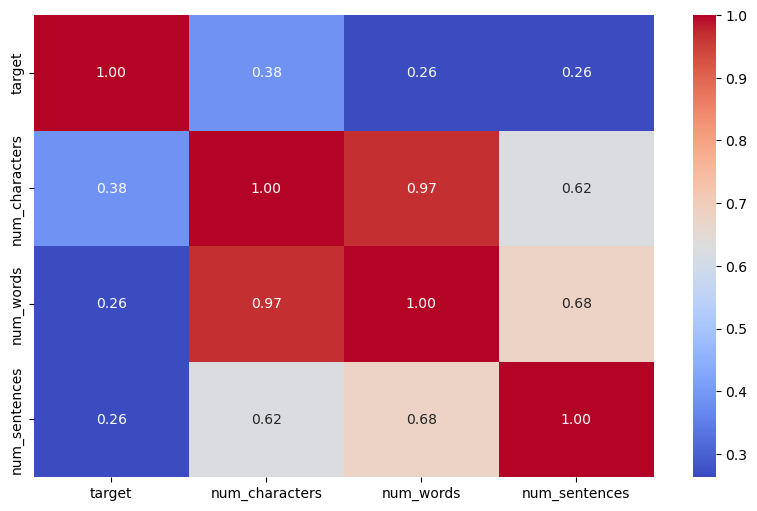

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


# Data Preprocessing
- Lower case
- Tokenization
- Remove special characters
- Removeing stop words and punctutaion
- Stemming

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

### 1. Import String Punctuation.

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### 2. Import Porter Stemmer.

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
transform_text('HII HOW ARE YOU loved the youtube lecture machine learning how about you ?')

'hii love youtub lectur machin learn'

In [44]:
df['transform_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


# Import Library WordCloud.

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

### 1. Spam WordCloud.

In [48]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

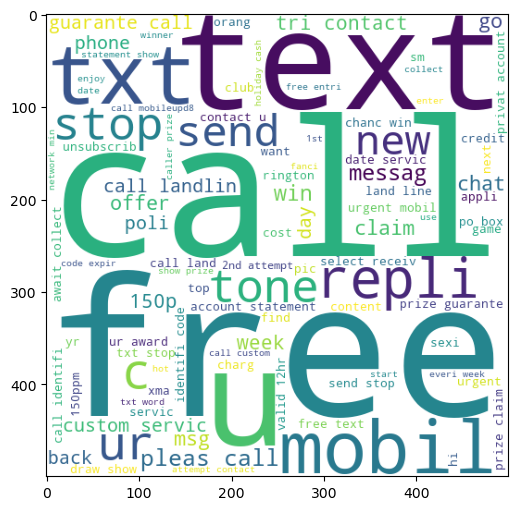

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc);

### 2. Ham WordCloud.

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

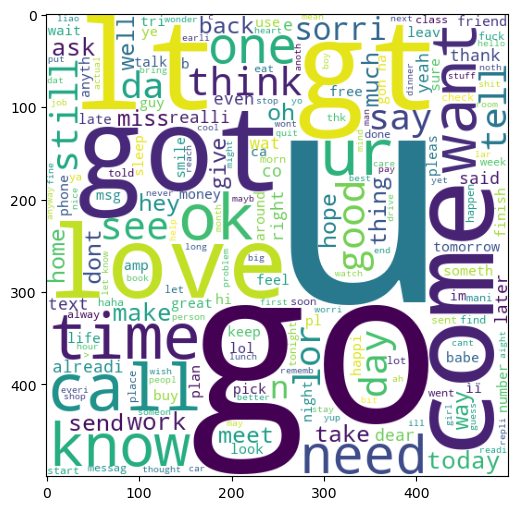

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc);

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[df['target'] ==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

# Import Library Counter.

In [55]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

### 1. Showing Bar Plot Spam Corpus.

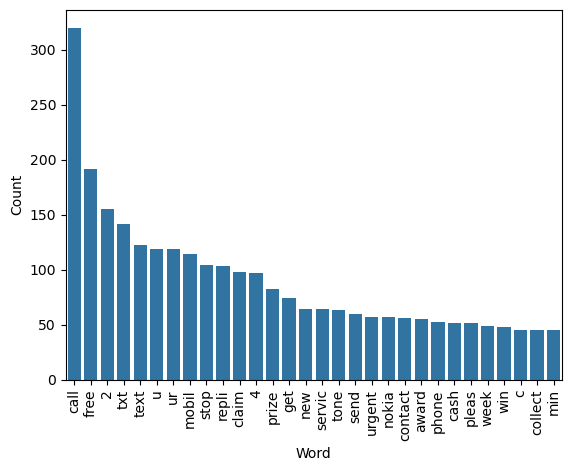

In [56]:
sns.barplot(x='Word', y='Count', data=word_freq)
plt.xticks(rotation=90)
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] ==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

### 2. Showing Bar Plot Ham Corpus.

In [59]:
from collections import Counter
count_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

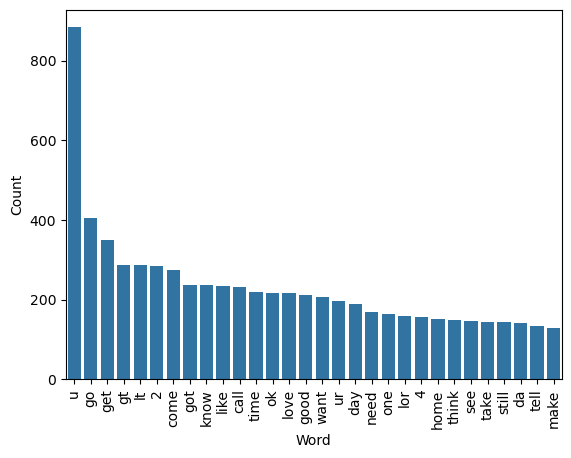

In [60]:
sns.barplot(x='Word', y='Count', data=count_freq)
plt.xticks(rotation=90)
plt.show()

# Model Building Model Creation Using Naive Bayes.

In [61]:
# Text Vectorization
# Using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 1. Feature Extraction Text.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
 X = tfidf.fit_transform(df['transform_text']).toarray()

In [64]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

### 2. Appending the number_character column to X.

In [65]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [66]:
X.shape

(5169, 3001)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

### 3. Splitting Data For Model Training & Testing.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### 4. Creating Object Import Library.

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### 5. Checking Values on GaussianNB Algorithm.

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


### 6. Checking Values on GaussianNB Algorithm.

In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
# tfidf --> MNB

!pip install xgboost


# import Necessary Algorithms for the Project.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [79]:
clfs = {
    'SVC'      : svc,
    'KN'       : knc,
    'NB'       : mnb,
    'DT'       : dtc,
    'LR'       : lrc,
    'RF'       : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC'      : etc,
    'GBDT'     : gbdt,
    'XGB'      : xgb
}

In [80]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8665377176015474, 0.0)

### 1. Checking Accuracy & Precision Value of all import Algorithms.

In [82]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For {name}: Accuracy = {acc:.4f}, Precision = {prec:.4f}")

    accuracy_scores.append(acc)
    precision_scores.append(prec)


For SVC: Accuracy = 0.8665, Precision = 0.0000
For KN: Accuracy = 0.9323, Precision = 0.8036
For NB: Accuracy = 0.9410, Precision = 1.0000
For DT: Accuracy = 0.9507, Precision = 0.8321
For LR: Accuracy = 0.9671, Precision = 0.9906
For RF: Accuracy = 0.9739, Precision = 0.9912
For AdaBoost: Accuracy = 0.9642, Precision = 0.9316
For BgC: Accuracy = 0.9642, Precision = 0.8976
For ETC: Accuracy = 0.9807, Precision = 0.9758
For GBDT: Accuracy = 0.9574, Precision = 0.9196
For XGB: Accuracy = 0.9720, Precision = 0.9658


### 2. Creating DataFrame Accuracy and Precision.

In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.973888,0.991150
4,LR,0.967118,0.990566
8,ETC,0.980658,0.975806
10,XGB,0.971954,0.965812
6,AdaBoost,0.964217,0.931624
9,GBDT,0.957447,0.919643
7,BgC,0.964217,0.897638
3,DT,0.950677,0.832061
1,KN,0.932302,0.803571


### 3. Creating DataFrame Variable and Value.

In [85]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithm')

In [86]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.973888
2,LR,Accuracy,0.967118
3,ETC,Accuracy,0.980658
4,XGB,Accuracy,0.971954
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.957447
7,BgC,Accuracy,0.964217
8,DT,Accuracy,0.950677
9,KN,Accuracy,0.932302


### 4. Applying Categorical plot between Algorithm & Value.

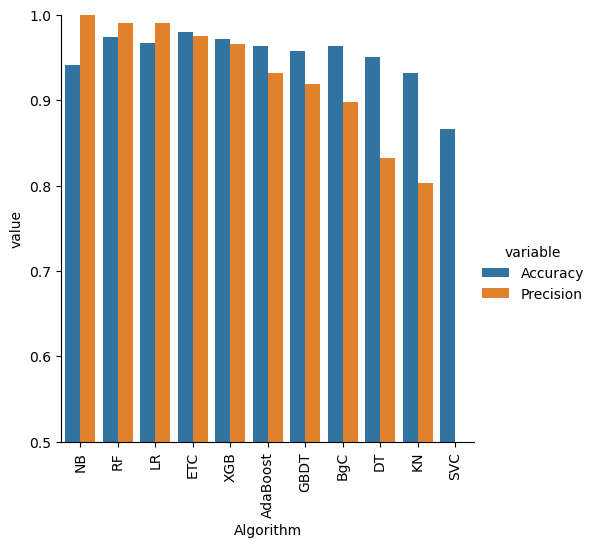

In [87]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data = performance_df1, kind = 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

# Model Improvement.

### 1. Change the max features parameter of TFIdf

In [88]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000': accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [89]:
new_df = pd.merge(performance_df,temp_df,on = 'Algorithm')

In [90]:
new_df_scaled = pd.merge(new_df,temp_df, on='Algorithm')

In [91]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
1,RF,0.973888,0.991150,0.973888,0.991150,0.973888,0.991150
2,LR,0.967118,0.990566,0.967118,0.990566,0.967118,0.990566
3,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
4,XGB,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812
5,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.957447,0.919643,0.957447,0.919643,0.957447,0.919643
7,BgC,0.964217,0.897638,0.964217,0.897638,0.964217,0.897638
8,DT,0.950677,0.832061,0.950677,0.832061,0.950677,0.832061
9,KN,0.932302,0.803571,0.932302,0.803571,0.932302,0.803571


### 2. Voting Classifier.

In [92]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


### 3. Applying Stacking.

In [96]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier

In [98]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

### 4. Checking Final Accuracy and Precision Value on Testing.

In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy on testing',accuracy_score(y_test,y_pred))
print('Precision on testing',precision_score(y_test,y_pred))

Accuracy on testing 0.9787234042553191
Precision on testing 0.9603174603174603


### 5. Checking Final Accuracy and Precision Value on Training.

In [100]:
y_pred_train = clf.predict(X_train)
print('Accuracy on training',accuracy_score(y_train,y_pred_train))
print('Precision on training',precision_score(y_train,y_pred_train))

Accuracy on training 0.9992744860943168
Precision on training 1.0


In [102]:
import joblib

joblib.dump(mnb, "model.pkl")        # save model correctly
joblib.dump(tfidf, "vectorizer.pkl") # save vectorizer correctly


['vectorizer.pkl']

In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))